<a href="https://colab.research.google.com/github/SurajJadhav-5/Heart_Disease_Prediction_Viz/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import files
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [2]:
# uploading data to drive
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
# reading data
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# cleaning data
data = data.drop(data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].index)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       290 non-null    int64  
 1   sex       290 non-null    int64  
 2   cp        290 non-null    int64  
 3   trestbps  290 non-null    int64  
 4   chol      290 non-null    int64  
 5   fbs       290 non-null    int64  
 6   restecg   290 non-null    int64  
 7   thalach   290 non-null    int64  
 8   exang     290 non-null    int64  
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    int64  
 11  ca        290 non-null    int64  
 12  thal      290 non-null    int64  
 13  target    290 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.0 KB


In [7]:
# splitting data into train and test
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = data['target']
X = data[columns]
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3


In [9]:
# creating object and fitting data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is ", accuracy_dt)


Decision Tree accuracy is  0.7945205479452054


[Text(0.625, 0.9583333333333334, 'X[12] <= 2.5\ngini = 0.498\nsamples = 217\nvalue = [101, 116]'),
 Text(0.4090909090909091, 0.875, 'X[11] <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [34, 98]'),
 Text(0.2727272727272727, 0.7916666666666666, 'X[9] <= 2.55\ngini = 0.227\nsamples = 92\nvalue = [12, 80]'),
 Text(0.18181818181818182, 0.7083333333333334, 'X[0] <= 57.5\ngini = 0.185\nsamples = 87\nvalue = [9, 78]'),
 Text(0.09090909090909091, 0.625, 'X[12] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.045454545454545456, 0.5416666666666666, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.022727272727272728, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06818181818181818, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13636363636363635, 0.5416666666666666, 'X[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(0.11363636363636363, 0.4583333333333333, 'X[10] <= 1.5\ngini = 0.375\nsamples = 4\nval

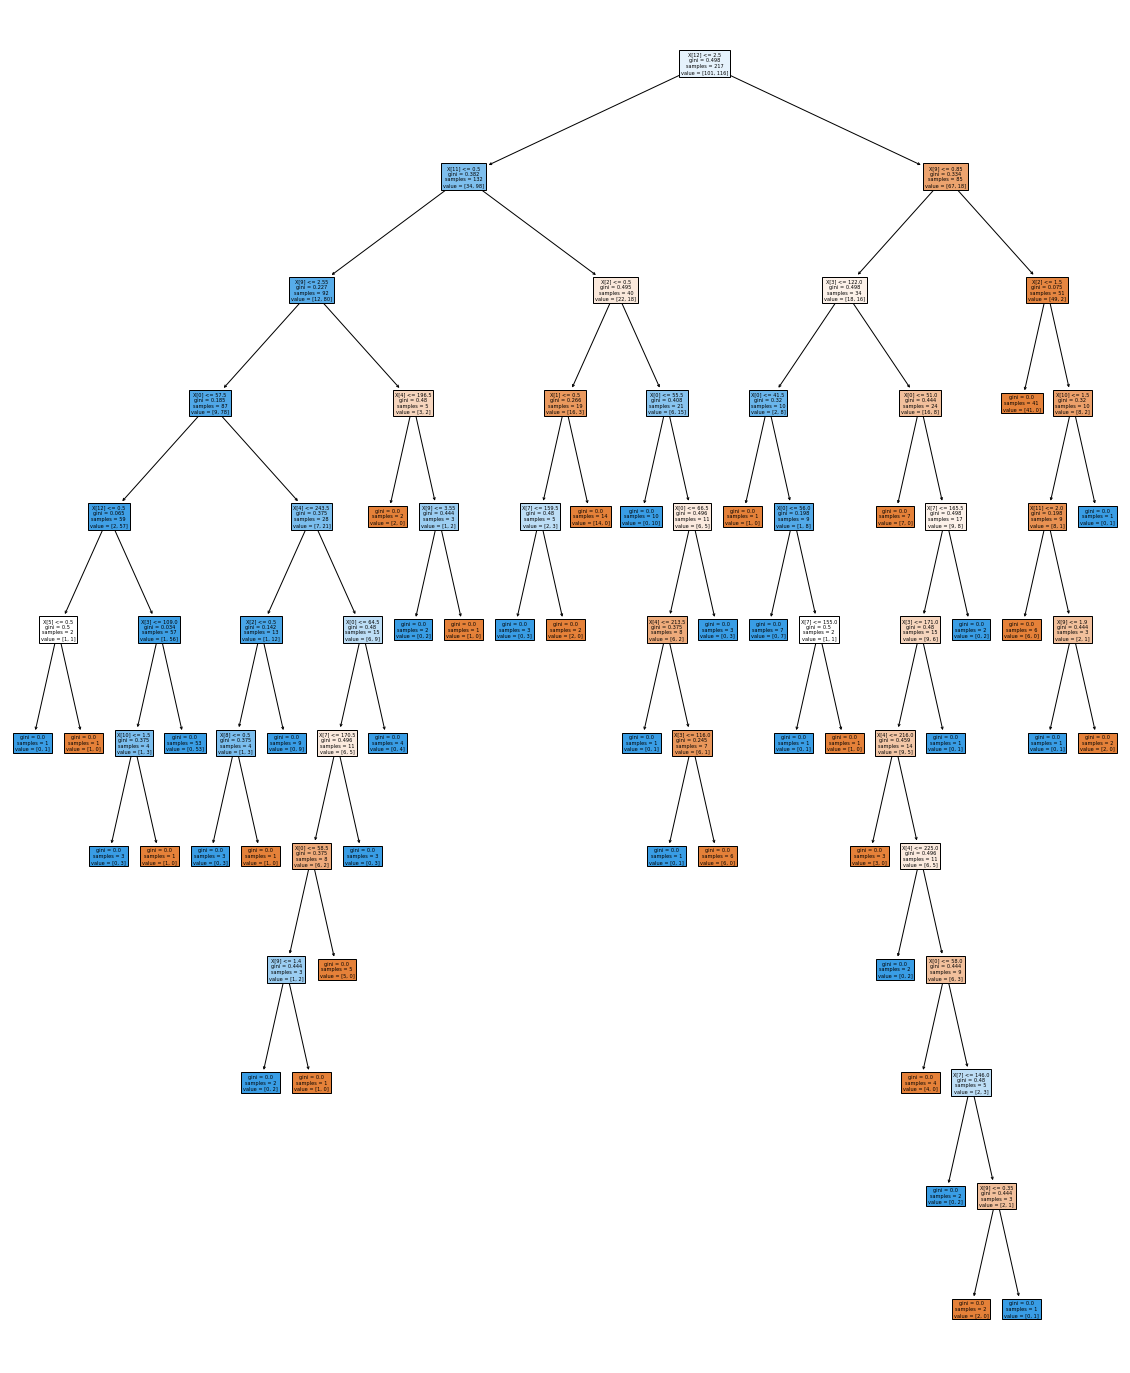

In [10]:
figure = plt.figure(figsize =(20, 25))
tree.plot_tree(decision_tree, filled=True)

In [11]:
text_representation = tree.export_text(decision_tree, feature_names=columns)
print(text_representation)

|--- thal <= 2.50
|   |--- ca <= 0.50
|   |   |--- oldpeak <= 2.55
|   |   |   |--- age <= 57.50
|   |   |   |   |--- thal <= 0.50
|   |   |   |   |   |--- fbs <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fbs >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- thal >  0.50
|   |   |   |   |   |--- trestbps <= 109.00
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- trestbps >  109.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  57.50
|   |   |   |   |--- chol <= 243.50
|   |   |   |   |   |--- cp <= 0.50
|   |   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- exang >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cp >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  243.50
|   |  

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]¶

In [12]:
# using gridsearchcv for getting best para
param_dict = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "max_features" : ["auto", "sqrt", "log2", None]
}

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(decision_tree, param_grid = param_dict, cv=10, n_jobs= -1)
# cv cross validation

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [15]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

In [16]:
grid.best_score_

0.8246753246753247

In [17]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [18]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto')
decision_tree.fit(X_train, y_train)
accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is ", accuracy_dt)

Decision Tree accuracy is  0.7945205479452054


[Text(0.5208333333333334, 0.9, 'X[8] <= 0.5\ngini = 0.498\nsamples = 217\nvalue = [101, 116]'),
 Text(0.3125, 0.7, 'X[9] <= 2.4\ngini = 0.43\nsamples = 147\nvalue = [46, 101]'),
 Text(0.16666666666666666, 0.5, 'X[7] <= 114.0\ngini = 0.389\nsamples = 136\nvalue = [36, 100]'),
 Text(0.08333333333333333, 0.3, 'X[10] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3, 'X[0] <= 56.5\ngini = 0.369\nsamples = 131\nvalue = [32, 99]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.252\nsamples = 81\nvalue = [12, 69]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.4583333333333333, 0.5, 'X[10] <= 0.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.4166666666666667, 0.3, 'X[3] <= 135.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(

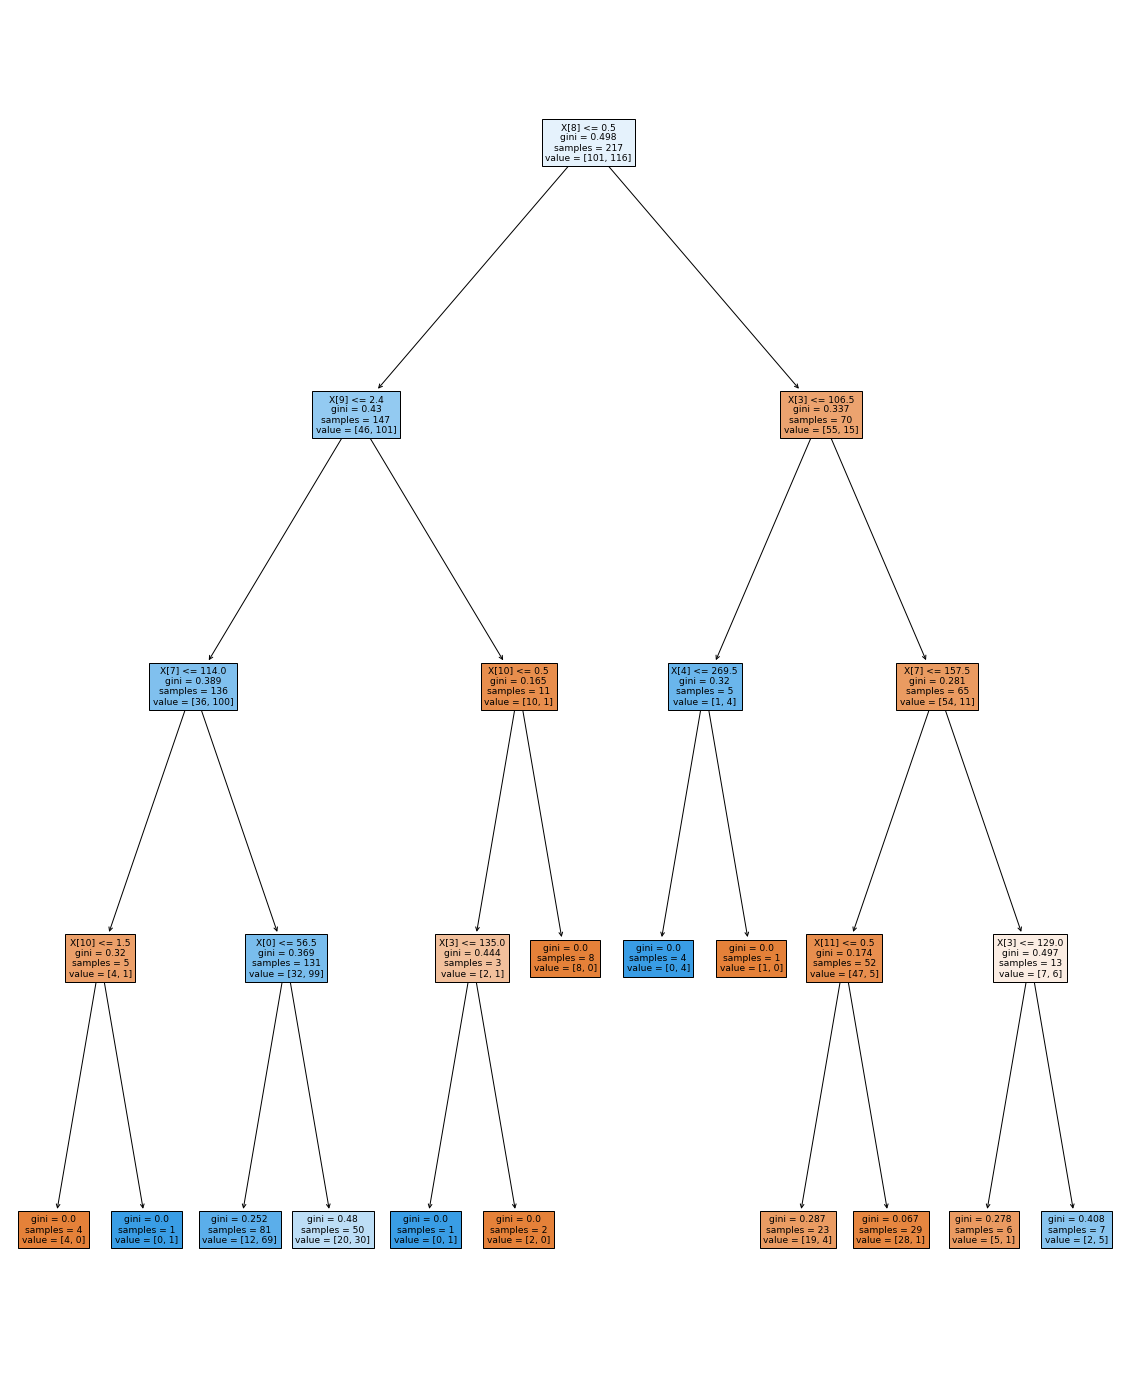

In [19]:
figure = plt.figure(figsize =(20, 25))
# _ = tree.plot_tree(decision_tree, feature_names=data[columns], class_names=data.target, filled=True)
tree.plot_tree(decision_tree, filled=True)